##### Iris Flower Classification Project

#### Importing Data and Neccessary Libraries

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#loading dataset
iris = load_iris()

#converting to dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df['Species_name']= df['Species'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### Cleaning Data

In [ ]:
#Rename columns (remove spaces and parentheses)
df.columns = [col.strip().replace(' (cm)', '').replace(' ', '_') for col in df.columns]

#Checking missing values
print("Missing values:\n", df.isnull().sum())

#Checking duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df = df.drop_duplicates()

#Checking data types
print("\nData types:\n", df.dtypes)

#Displaying After Cleaning
print("\nCleaned Data (first 5 rows):\n", df.head())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
Species_name    0
dtype: int64

Number of duplicate rows: 0

Data types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
Species           int64
Species_name     object
dtype: object

Cleaned Data (first 5 rows):
    sepal_length  sepal_width  petal_length  petal_width  Species Species_name
0           5.1          3.5           1.4          0.2        0       setosa
1           4.9          3.0           1.4          0.2        0       setosa
2           4.7          3.2           1.3          0.2        0       setosa
3           4.6          3.1           1.5          0.2        0       setosa
4           5.0          3.6           1.4          0.2        0       setosa


#### Spliting Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
x = iris.data
y=iris.target

#Spliting (80% train , 20% test)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

(150, 4)
(150,)
(120, 4)
(30, 4)
(120,)
(30,)


#### Training a classification Model

In [ ]:
# using k-nearest neighbors (KNN) Classification
from sklearn.neighbors import KNeighborsClassifier

# Creating model
model = KNeighborsClassifier(n_neighbors=3)

# Training model
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

#### Testing the model and evaluating accuracy

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

#predicting the test set
y_pred = model.predict(x_test)

#evaluating accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

#classification report
print("\nClassification Report:\n,",classification_report(y_test,y_pred, target_names=iris.target_names))

Accuracy: 1.0

Classification Report:
,               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Visualizing Data


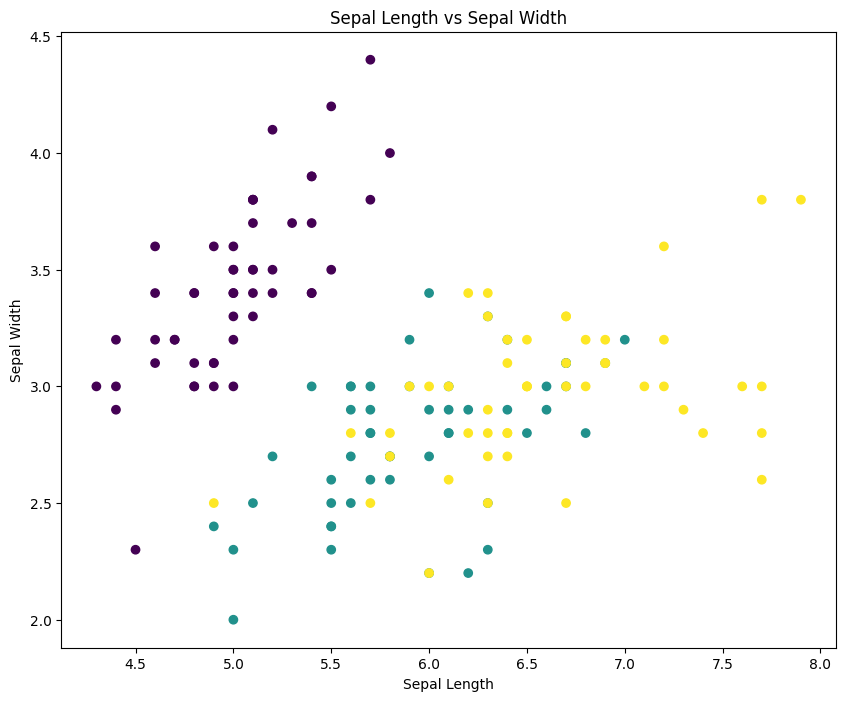

In [ ]:
# using matplotlib
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111)
ax1.scatter(df['sepal_length'], df['sepal_width'], c=df['Species'], cmap='viridis')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.set_title('Sepal Length vs Sepal Width')
plt.show()

#### Using Seaborn for better Visualization

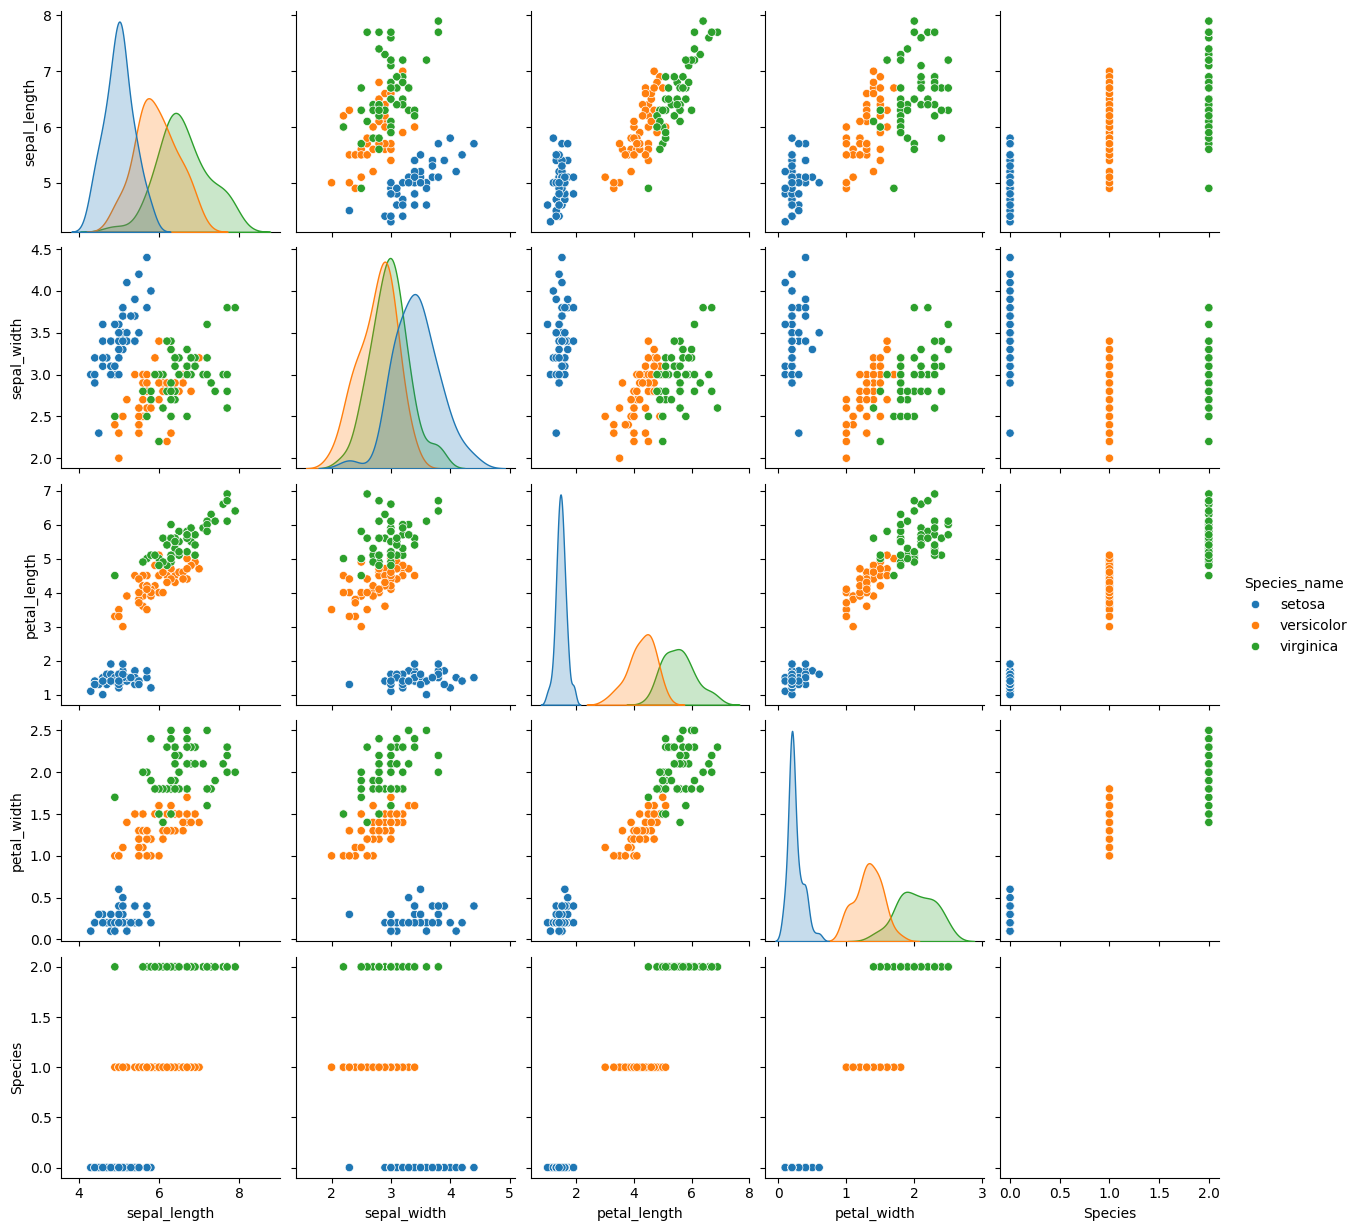

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='Species_name')
plt.show()
# using pairplot we can visualize all the combination

#### Conlcusion
This project successfully implemented a K-Nearest Neighbors model to classify the Iris dataset. The model achieved high accuracy on the test set. Data cleaning steps were applied to handle duplicates, and visualizations were used to explore the relationships between features and species.